In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-08-20 21:46:10,234 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncfs = [NCFile('/artemis/readout/2016-08-19_130149_scan_lo_790.0_MHz.nc'),
        NCFile('/artemis/readout/2016-08-19_130255_scan_lo_980.0_MHz.nc'),]

In [4]:
swas = [nc.SweepArray0 for nc in ncfs]

In [29]:
from kid_readout.analysis.resonator import find_resonators
reload(find_resonators)

<module 'kid_readout.analysis.resonator.find_resonators' from '/home/gjones/kid_readout/kid_readout/analysis/resonator/find_resonators.py'>

In [9]:
swa = swas[0]
mask = swa.frequency > 824e6

<IPython.core.display.Javascript object>


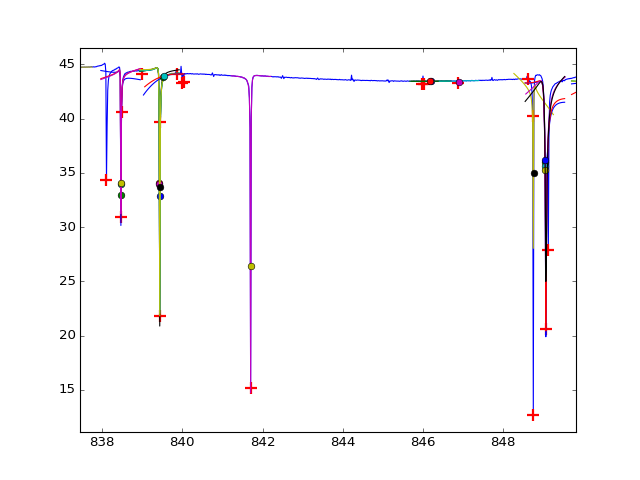

INFO     2016-08-20 22:04:48,908 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 838467767.2  838108590.0
INFO     2016-08-20 22:06:02,411 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 888652400.6  888173649.0
INFO     2016-08-20 22:06:04,017 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 888187500.0  888675874.7
INFO     2016-08-20 22:09:31,324 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1007698308.6  1007884807.5
INFO     2016-08-20 22:09:32,006 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1007698302.7  1007884802.4


In [10]:
figure()
res1 = find_resonators.find_resonators(swa.frequency[mask],swa.s21_point[mask],
                                       swa.s21_point_error[mask],make_plot=True,annotate=False,frequency_span=500e3)

<IPython.core.display.Javascript object>


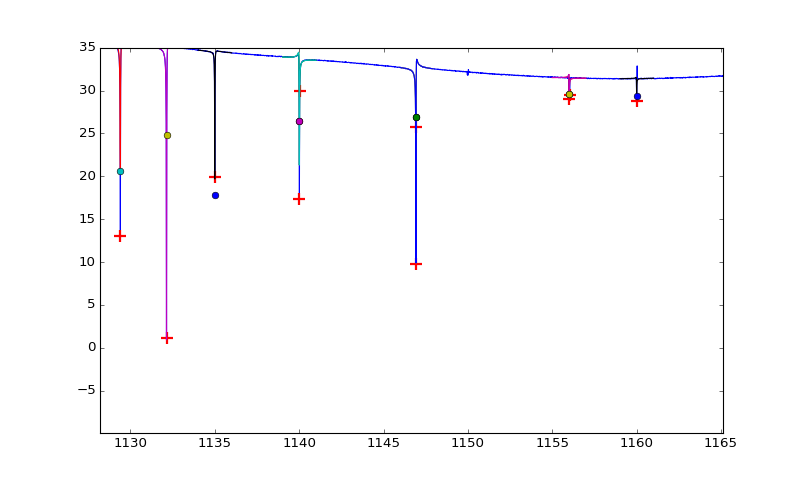

INFO     2016-08-20 21:56:51,302 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1052944233.5  1052621403.7
INFO     2016-08-20 21:57:17,105 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1115825161.1  1115447096.5


In [8]:
swa = swas[1]
figure()
res2 = find_resonators.find_resonators(swa.frequency,swa.s21_point,swa.s21_point_error,make_plot=True,annotate=False)

In [11]:
res = res1+res2

In [24]:
len(res)

259

In [30]:
valid = [r for r in res if find_resonators.validate_resonator(r)]

825117377.435 825406250.028 failed shallow
828109374.99 failed shallow
827958659.788 failed shallow
828447388.872 830937499.999 failed high range
830953124.998 failed high range
830671929.125 failed shallow
834655195.286 failed shallow
837250688.241 failed high Qei
838467903.77 838467844.184 838467782.988 839432192.673 839431010.833 839431019.862 839431270.52 839515625.01 failed shallow
839546875.44 failed shallow
841706157.185 846211417.927 failed shallow
846168640.979 failed shallow
846905933.633 failed shallow
848756942.517 849040645.689 849041825.778 849047193.747 849043904.867 850198357.44 850198433.104 850198450.939 850198504.417 850197189.062 851251660.645 failed high Qer
852091560.728 failed high Qer
853064253.481 failed shallow
853874387.699 failed high Qe
854549764.52 failed shallow
855406249.961 failed high range
858316397.408 858907777.554 858907836.057 858908252.378 860020680.142 failed shallow
860020731.841 failed shallow
861265625.0 failed low Qe
865213019.407 865213015.

In [31]:
len(valid)

178

In [32]:
unival = find_resonators.remove_duplicates(valid)

found duplicate of  838467844.184 distance 59.5863543749
found duplicate of  838467782.988 distance 120.781955361
found duplicate of  839431010.833 distance 1181.83929586
found duplicate of  839431019.862 distance 1172.81112683
found duplicate of  839431270.52 distance 922.152379632
found duplicate of  849041825.778 distance 1180.08911109
found duplicate of  849047193.747 distance 6548.05816269
found duplicate of  849043904.867 distance 3259.17834008
found duplicate of  850198433.104 distance 75.6641973257
found duplicate of  850198450.939 distance 93.4993523359
found duplicate of  850198504.417 distance 146.977305174
found duplicate of  850197189.062 distance 1168.3777951
found duplicate of  858907836.057 distance 58.5030173063
found duplicate of  858908252.378 distance 474.824069381
found duplicate of  865213015.73 distance 3.6774545908
found duplicate of  866720126.821 distance 2.55045437813
found duplicate of  869695465.26 distance 67.0811591148
found duplicate of  869695791.935 di

In [33]:
len(unival)

93

In [36]:
swa = swas[1]

<IPython.core.display.Javascript object>


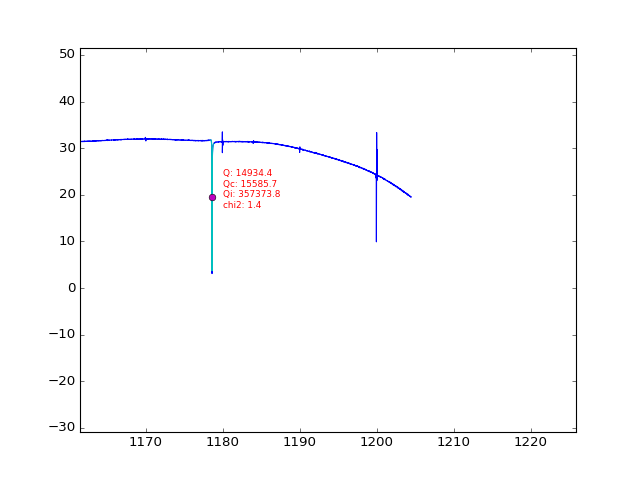

In [37]:
figure()
find_resonators.plot_results(swa.frequency,swa.s21_point,unival)

In [40]:
missing = np.array([830.471,
                   838.104,
                   854.914,
                    883.293,
                    883.452,
                    928.916,
                    931.000,
                    937.662,
                    955.178,
                    959.436,
                    963.983,
                    966.915,
                    967.986,
                    973.619,
                    975.313,
                    979.861,
                    981.559,
                    1001.76,
                    1018.50,
                    1036.34,
                    1052.95,
                    1076.03,
                    1110.01,
                    1115.45,
                    1118.1,
                    1140.0,
                    
                   ])*1e6

In [41]:
len(missing)

26

In [42]:
univalf0 = [r.f_0 for r in unival]

In [43]:
allf0 = np.concatenate((univalf0,missing))
allf0.sort()

<IPython.core.display.Javascript object>


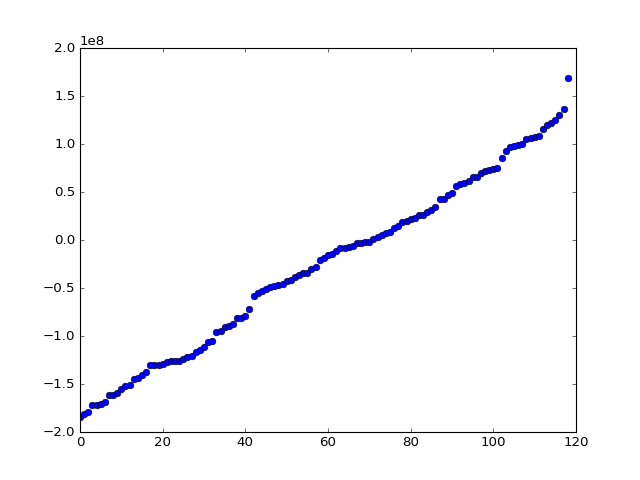

In [49]:
figure()
plot(allf0-1010e6,'o')

In [51]:
allf0.shape

(119,)

In [50]:
np.diff(allf0)

60966.177458524704

In [52]:
np.save('/artemis/readout/resonances/2016-08-20-JPL-8x8-HF-1_119-resonances.npy',allf0)

In [61]:
allf0.min()-1010e6

-184882622.56527424

In [55]:
32*512e6/2**17

125000.0

In [56]:
512/2**14.

0.03125

In [58]:
allf0.max()+(128-119)*1e6 - 1010e6

177615224.79359722